In [ ]:
import pandas as pd

# Load the uploaded CSV dataset to explore its structure
file_path = "depression_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows and basic info to understand the dataset
data_head = data.head()
data_info = data.info()

data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330283 entries, 0 to 330282
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          330283 non-null  object 
 1   Age                           330282 non-null  float64
 2   Marital Status                330282 non-null  object 
 3   Education Level               330282 non-null  object 
 4   Number of Children            330282 non-null  float64
 5   Smoking Status                330282 non-null  object 
 6   Physical Activity Level       330282 non-null  object 
 7   Employment Status             330282 non-null  object 
 8   Income                        330282 non-null  float64
 9   Alcohol Consumption           330282 non-null  object 
 10  Dietary Habits                330282 non-null  object 
 11  Sleep Patterns                330282 non-null  object 
 12  History of Mental Illness     330282 non-nul

(               Name   Age Marital Status    Education Level  \
 0  Christine Barker  31.0        Married  Bachelor's Degree   
 1  Jacqueline Lewis  55.0        Married        High School   
 2    Shannon Church  78.0        Widowed    Master's Degree   
 3    Charles Jordan  58.0       Divorced    Master's Degree   
 4      Michael Rich  18.0         Single        High School   
 
    Number of Children Smoking Status Physical Activity Level  \
 0                 2.0     Non-smoker                  Active   
 1                 1.0     Non-smoker               Sedentary   
 2                 1.0     Non-smoker               Sedentary   
 3                 3.0     Non-smoker                Moderate   
 4                 0.0     Non-smoker               Sedentary   
 
   Employment Status     Income Alcohol Consumption Dietary Habits  \
 0        Unemployed   26265.67            Moderate       Moderate   
 1          Employed   42710.36                High      Unhealthy   
 2          

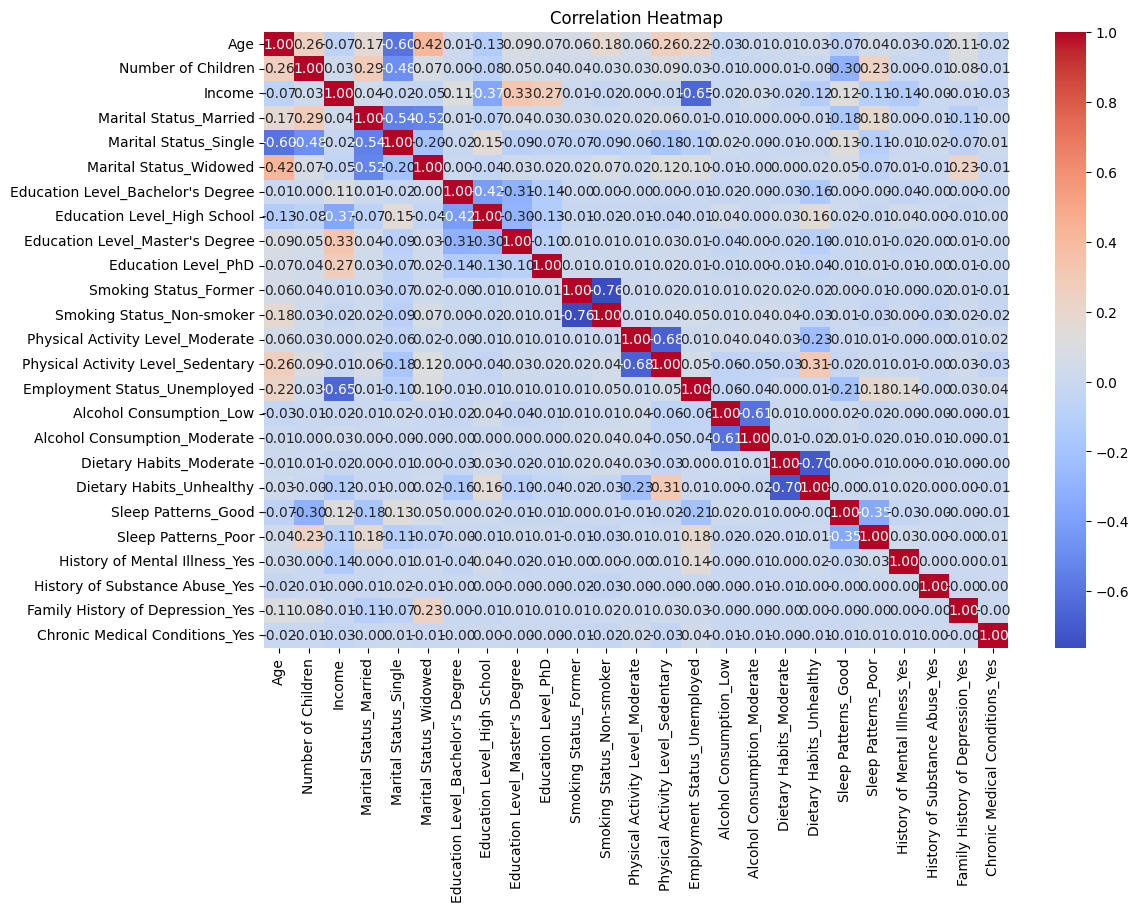

(Age                             1
 Marital Status                  1
 Education Level                 1
 Number of Children              1
 Smoking Status                  1
 Physical Activity Level         1
 Employment Status               1
 Income                          1
 Alcohol Consumption             1
 Dietary Habits                  1
 Sleep Patterns                  1
 History of Mental Illness       1
 History of Substance Abuse      1
 Family History of Depression    1
 Chronic Medical Conditions      1
 dtype: int64,
                  Age  Number of Children         Income
 count  330282.000000       330282.000000  330282.000000
 mean       48.979947            1.299935   50684.311238
 std        18.157756            1.237843   40626.259411
 min        18.000000            0.000000       0.410000
 25%        33.000000            0.000000   21024.757500
 50%        49.000000            1.000000   37540.605000
 75%        65.000000            2.000000   76629.642500
 max

In [ ]:

# CELL-1
# 1. Dataset Cleaning and Exploration

# Dropping irrelevant columns (like 'Name')
data_cleaned = data.drop(columns=['Name'])

# Checking for missing values
missing_values = data_cleaned.isnull().sum()

# Summary statistics for numerical columns
numerical_summary = data_cleaned.describe()

# Encoding categorical variables for better exploration
data_cleaned_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Correlation matrix to explore relationships between numerical features
correlation_matrix = data_cleaned_encoded.corr()

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Checking unique values for some key categorical features
unique_values = {
    'Marital Status': data['Marital Status'].unique(),
    'Education Level': data['Education Level'].unique(),
    'Physical Activity Level': data['Physical Activity Level'].unique(),
    'Employment Status': data['Employment Status'].unique(),
    'Chronic Medical Conditions': data['Chronic Medical Conditions'].unique(),
}

missing_values, numerical_summary, unique_values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Pre-processing: Encoding categorical features and normalizing numerical data
# Encoding categorical variables (one-hot encoding)
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Separating features and target (assuming 'Chronic Medical Conditions' as the target variable)
X = data_encoded.drop('Chronic Medical Conditions_Yes', axis=1)
y = data_encoded['Chronic Medical Conditions_Yes']

# Train-test split (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalizing the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Checking shapes to confirm proper split
train_shape = X_train_scaled.shape
val_shape = X_val_scaled.shape
test_shape = X_test_scaled.shape

train_shape, val_shape, test_shape


((231198, 24), (49542, 24), (49543, 24))

<ipython-input-4-a09e248abe24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


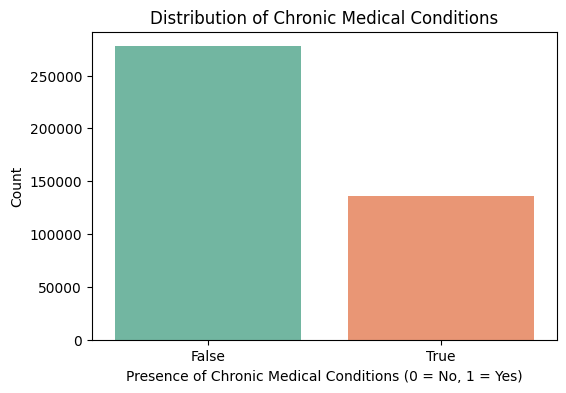

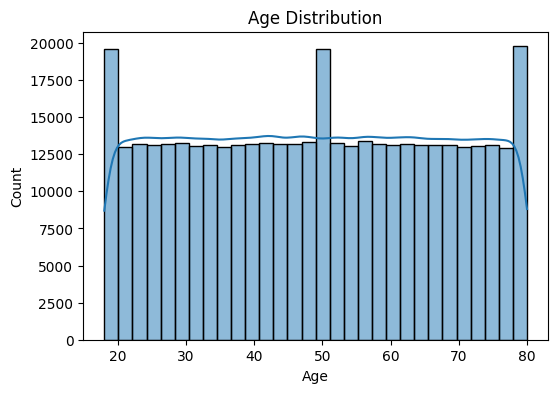

<ipython-input-4-a09e248abe24>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Chronic Medical Conditions', y='Income', data=data_cleaned, palette='Set3')


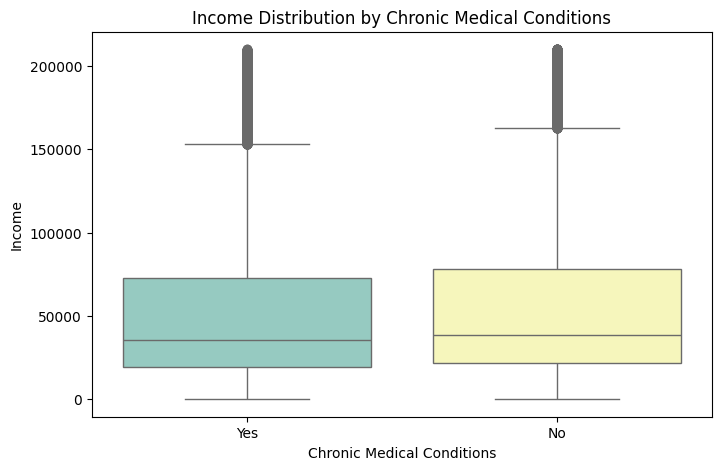

<ipython-input-4-a09e248abe24>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Number of Children', y='Chronic Medical Conditions_Yes', data=data_encoded, ci=None, palette='Set1')
<ipython-input-4-a09e248abe24>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Children', y='Chronic Medical Conditions_Yes', data=data_encoded, ci=None, palette='Set1')


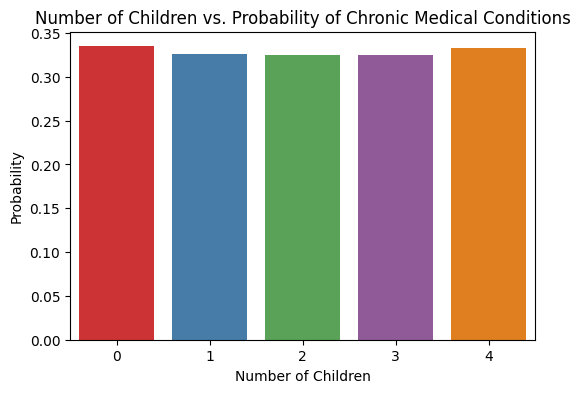

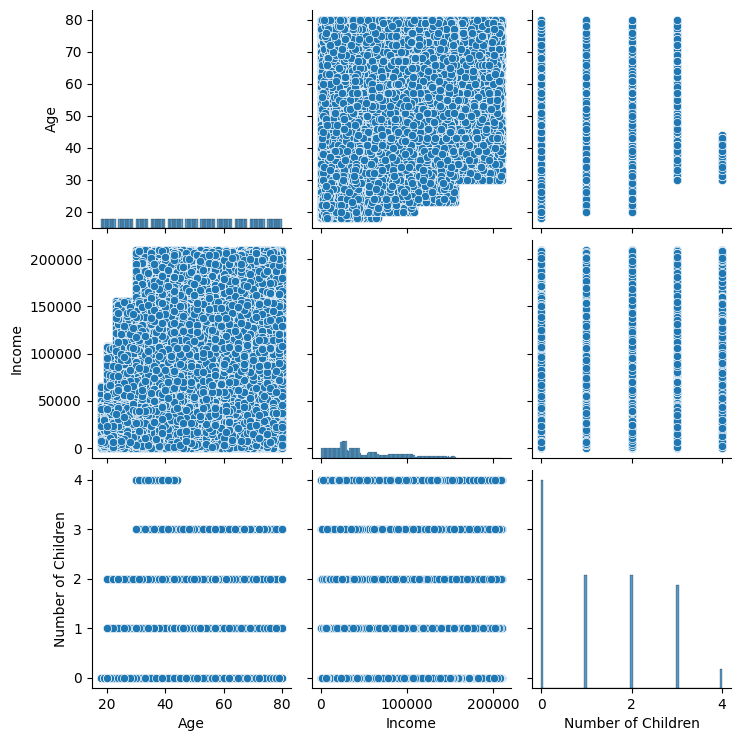

In [ ]:
# 3. Exploratory Data Analysis (EDA) and Visualizations

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable (Chronic Medical Conditions)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title('Distribution of Chronic Medical Conditions')
plt.xlabel('Presence of Chronic Medical Conditions (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Income distribution by Chronic Medical Conditions
plt.figure(figsize=(8, 5))
sns.boxplot(x='Chronic Medical Conditions', y='Income', data=data_cleaned, palette='Set3')
plt.title('Income Distribution by Chronic Medical Conditions')
plt.xlabel('Chronic Medical Conditions')
plt.ylabel('Income')
plt.show()

# Number of Children vs. Chronic Medical Conditions
plt.figure(figsize=(6, 4))
sns.barplot(x='Number of Children', y='Chronic Medical Conditions_Yes', data=data_encoded, ci=None, palette='Set1')
plt.title('Number of Children vs. Probability of Chronic Medical Conditions')
plt.xlabel('Number of Children')
plt.ylabel('Probability')
plt.show()

# Pairplot to explore relationships among Age, Income, and Children
sns.pairplot(data_cleaned[['Age', 'Income', 'Number of Children']])
plt.show()


In [ ]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# 1. Load and Clean the Data
data = pd.read_csv("depression_data.csv")
data = data.drop(columns=["Name"])  # Drop irrelevant columns

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop(columns=["Chronic Medical Conditions_Yes"])
y = data_encoded["Chronic Medical Conditions_Yes"]

# Split the data into train, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Use StandardScaler to normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Compute class weights to address imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}


# Initialize Logistic Regression with Batch Gradient Descent
log_reg = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluate and print the accuracy only
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")


Logistic Regression Accuracy: 0.57


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression with Stochastic Gradient Descent
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, class_weight='balanced', random_state=42)

# Train the model
sgd.fit(X_train_scaled, y_train)

# Predict on validation set and print accuracy
y_pred_sgd = sgd.predict(X_val_scaled)
sgd_accuracy = accuracy_score(y_val, y_pred_sgd)
print(f"SGD Accuracy: {sgd_accuracy:.2f}")


SGD Accuracy: 0.52


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Perform RFE
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_scaled, y_train)

# Transform the dataset based on selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_val_rfe = rfe.transform(X_val_scaled)

print("Selected Features by RFE:", np.array(X.columns)[rfe.support_])


Selected Features by RFE: ["Education Level_Bachelor's Degree" 'Smoking Status_Former'
 'Smoking Status_Non-smoker' 'Physical Activity Level_Moderate'
 'Physical Activity Level_Sedentary' 'Employment Status_Unemployed'
 'Alcohol Consumption_Low' 'Alcohol Consumption_Moderate'
 'Dietary Habits_Moderate' 'Dietary Habits_Unhealthy']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression with L2 regularization (default penalty)
log_reg = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000, random_state=42)

# Perform RFE to select the top 10 features
rfe = RFE(estimator=log_reg, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

# Transform the datasets based on selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_val_rfe = rfe.transform(X_val_scaled)

# Train Logistic Regression on the RFE-selected features
ridge_log_reg = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000, random_state=42)
ridge_log_reg.fit(X_train_rfe, y_train)

# Predict on the validation set
y_val_pred = ridge_log_reg.predict(X_val_rfe)

# Calculate and print accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"L2 (Ridge) Logistic Regression - Validation Accuracy: {accuracy:.2f}")

# Print the selected features
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {selected_features.tolist()}")


L2 (Ridge) Logistic Regression - Validation Accuracy: 0.57
Selected Features: ["Education Level_Bachelor's Degree", 'Smoking Status_Former', 'Smoking Status_Non-smoker', 'Physical Activity Level_Moderate', 'Physical Activity Level_Sedentary', 'Employment Status_Unemployed', 'Alcohol Consumption_Low', 'Alcohol Consumption_Moderate', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("depression_data.csv")

# Drop irrelevant columns (if applicable)
data = data.drop(columns=["Name"], errors='ignore')

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop(columns=["Chronic Medical Conditions_Yes"])
y = data_encoded["Chronic Medical Conditions_Yes"]

# Split the data into train, validation, and test sets (70% train, 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with L2 regularization for RFE
log_reg = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000, random_state=42)

# Perform RFE to select the top 5 features
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Transform the datasets based on selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_val_rfe = rfe.transform(X_val_scaled)

# Print the selected top 5 features
selected_features = X_train.columns[rfe.support_]
print(f"Selected Top 5 Features: {selected_features.tolist()}")

# Train Logistic Regression with L2 regularization on the RFE-selected features
ridge_log_reg = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000, random_state=42)
ridge_log_reg.fit(X_train_rfe, y_train)

# Predict on the validation set
y_val_pred = ridge_log_reg.predict(X_val_rfe)

# Calculate and print accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"L2 (Ridge) Logistic Regression - Validation Accuracy: {accuracy:.2f}")


Selected Top 5 Features: ['Smoking Status_Former', 'Smoking Status_Non-smoker', 'Physical Activity Level_Sedentary', 'Employment Status_Unemployed', 'Alcohol Consumption_Low']
L2 (Ridge) Logistic Regression - Validation Accuracy: 0.56


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

print(f"Explained Variance by PCA: {pca.explained_variance_ratio_}")


Explained Variance by PCA: [0.10874669 0.08999676 0.08124297 0.07687204 0.07111345 0.06669514
 0.05913334 0.05634454 0.05047222 0.04666486]


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(f"Class distribution after SMOTE: {pd.Series(y_train_balanced).value_counts()}")


Class distribution after SMOTE: Chronic Medical Conditions_Yes
False    194292
True     194292
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply PCA to reduce dimensionality (retain 95% of variance)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_balanced)  # Using SMOTE-balanced data
X_val_pca = pca.transform(X_val_scaled)  # Apply same transformation to validation data

# Train Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_pca.fit(X_train_pca, y_train_balanced)

# Predict on the validation set
y_val_pred_pca = log_reg_pca.predict(X_val_pca)

# Calculate and print accuracy
accuracy_pca = accuracy_score(y_val, y_val_pred_pca)
print(f"Logistic Regression with PCA - Accuracy: {accuracy_pca:.2f}")


Logistic Regression with PCA - Accuracy: 0.54


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression on SMOTE-balanced data
log_reg = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)

# Predict probabilities on the validation set
y_val_proba = log_reg.predict_proba(X_val_scaled)[:, 1]


In [ ]:
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

# Find the optimal threshold (based on maximum TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.5127120291024173


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict with the optimal threshold
y_val_pred_optimal = (y_val_proba >= optimal_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred_optimal)
print(f"Accuracy: {accuracy:.2f}")

# Evaluate the model with confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_optimal))
print("Classification Report:\n", classification_report(y_val, y_val_pred_optimal, zero_division=1))


Accuracy: 0.60
Confusion Matrix:
 [[29755 11879]
 [12811  7620]]
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.71      0.71     41634
        True       0.39      0.37      0.38     20431

    accuracy                           0.60     62065
   macro avg       0.54      0.54      0.54     62065
weighted avg       0.60      0.60      0.60     62065



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
dt_grid_search = GridSearchCV(estimator=dt_clf, param_grid=dt_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best estimator and parameters
best_dt_clf = dt_grid_search.best_estimator_
best_dt_params = dt_grid_search.best_params_

# Predict on the validation set using the best model
y_val_pred_dt = best_dt_clf.predict(X_val_scaled)

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(y_val, y_val_pred_dt)

# Display the results
print(f"Best Decision Tree Parameters: {best_dt_params}")
print(f"Decision Tree - Validation Accuracy: {dt_accuracy:.2f}")


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree - Validation Accuracy: 0.57


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced_scaled, y_train_balanced)

# Get the best estimator and parameters
best_dt = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best Decision Tree on the validation set
y_val_pred_dt = best_dt.predict(X_val_scaled)

# Calculate metrics for Decision Tree
dt_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred_dt),
    "Precision": precision_score(y_val, y_val_pred_dt),
    "Recall": recall_score(y_val, y_val_pred_dt),
    "F1 Score": f1_score(y_val, y_val_pred_dt)
}

# Display the results
print("Best Decision Tree Parameters:", best_params)
print("Decision Tree - Validation Metrics:", dt_metrics)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_val_pred_dt))


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree - Validation Metrics: {'Accuracy': 0.6309836461773947, 'Precision': 0.34634510193933365, 'Recall': 0.1363614115804415, 'F1 Score': 0.19568042142230027}
Confusion Matrix:
 [[36376  5258]
 [17645  2786]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.87      0.76     41634
        True       0.35      0.14      0.20     20431

    accuracy                           0.63     62065
   macro avg       0.51      0.51      0.48     62065
weighted avg       0.57      0.63      0.57     62065



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier with default parameters
rf_clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the validation set
y_val_pred_rf = rf_clf.predict(X_val_scaled)

# Calculate and print accuracy
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest - Validation Accuracy: {rf_accuracy:.2f}")


Random Forest - Validation Accuracy: 0.59


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("depression_data.csv")

# Drop irrelevant columns (if applicable)
data = data.drop(columns=["Name"], errors='ignore')

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data_encoded.drop(columns=["Chronic Medical Conditions_Yes"])
y = data_encoded["Chronic Medical Conditions_Yes"]

# Split the data into train, validation, and test sets (70% train, 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier with suitable hyperparameters
rf_clf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=20,             # Maximum depth of the tree
    min_samples_split=5,      # Minimum number of samples required to split
    min_samples_leaf=2,       # Minimum number of samples at a leaf node
    class_weight='balanced',  # Handle class imbalance
    random_state=42,          # For reproducibility
    n_jobs=-1                 # Use all processors
)

# Train the Random Forest on the scaled training data
rf_clf.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val_scaled)

# Calculate and print accuracy
rf_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Random Forest - Validation Accuracy: {rf_accuracy:.2f}")


Random Forest - Validation Accuracy: 0.61


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred_gnb = gnb.predict(X_val_scaled)

# Calculate and print accuracy
gnb_accuracy = accuracy_score(y_val, y_val_pred_gnb)
print(f"Gaussian Naive Bayes - Accuracy: {gnb_accuracy:.2f}")


Gaussian Naive Bayes - Accuracy: 0.67


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train Bernoulli Naive Bayes (requires binary data)
bnb = BernoulliNB()
bnb.fit(X_train_scaled > 0, y_train)  # Convert features to binary

# Predict on validation set
y_val_pred_bnb = bnb.predict(X_val_scaled > 0)

# Calculate and print accuracy
bnb_accuracy = accuracy_score(y_val, y_val_pred_bnb)
print(f"Bernoulli Naive Bayes - Accuracy: {bnb_accuracy:.2f}")


Bernoulli Naive Bayes - Accuracy: 0.67


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the MLPClassifier (Perceptron/Neural Network)
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # Activation function: ReLU
    solver='adam',                 # Optimizer: Adam
    max_iter=300,                  # Maximum number of iterations
    random_state=42,               # Ensure reproducibility
    early_stopping=True,           # Enable early stopping to avoid overfitting
    n_iter_no_change=10            # Stop training if no improvement for 10 iterations
)

# Train the MLPClassifier on the training data
mlp.fit(X_train_balanced_scaled, y_train_balanced)

# Predict on the validation set
y_val_pred_mlp = mlp.predict(X_val_scaled)

# Calculate metrics for MLP
mlp_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred_mlp),
    "Precision": precision_score(y_val, y_val_pred_mlp),
    "Recall": recall_score(y_val, y_val_pred_mlp),
    "F1 Score": f1_score(y_val, y_val_pred_mlp)
}

# Display the metrics and classification report
print("MLP Classifier - Validation Metrics:", mlp_metrics)
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_mlp))
print("Classification Report:\n", classification_report(y_val, y_val_pred_mlp))


MLP Classifier - Validation Metrics: {'Accuracy': 0.6670587287521147, 'Precision': 0.3706992230854606, 'Recall': 0.01634770691596104, 'F1 Score': 0.031314457153572096}
Confusion Matrix:
 [[41067   567]
 [20097   334]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.99      0.80     41634
        True       0.37      0.02      0.03     20431

    accuracy                           0.67     62065
   macro avg       0.52      0.50      0.42     62065
weighted avg       0.57      0.67      0.55     62065



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Function to train and evaluate MLP with different activation functions
def train_evaluate_mlp(activation_function):
    print(f"\nTraining MLP with activation function: {activation_function}")

    # Initialize MLP with the given activation function
    mlp = MLPClassifier(
        hidden_layer_sizes=(100, 50),  # Two hidden layers
        activation=activation_function,  # Activation function
        solver='adam',  # Optimizer
        max_iter=300,  # Maximum iterations
        random_state=42,  # Reproducibility
        early_stopping=True,  # Enable early stopping
        n_iter_no_change=10  # Stop if no improvement in 10 iterations
    )

    # Train the MLP on the training data
    mlp.fit(X_train_balanced_scaled, y_train_balanced)

    # Predict on the validation set
    y_val_pred = mlp.predict(X_val_scaled)

    # Calculate and display metrics
    metrics = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1 Score": f1_score(y_val, y_val_pred)
    }

    print("MLP Classifier Metrics:", metrics)
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    print("Classification Report:\n", classification_report(y_val, y_val_pred))

# List of activation functions to try
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# Train and evaluate MLP with each activation function
for activation in activation_functions:
    train_evaluate_mlp(activation)



Training MLP with activation function: identity
MLP Classifier Metrics: {'Accuracy': 0.58709417546121, 'Precision': 0.3258246178600161, 'Recall': 0.2378738191963193, 'F1 Score': 0.27498797634877076}
Confusion Matrix:
 [[31578 10056]
 [15571  4860]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.76      0.71     41634
        True       0.33      0.24      0.27     20431

    accuracy                           0.59     62065
   macro avg       0.50      0.50      0.49     62065
weighted avg       0.56      0.59      0.57     62065


Training MLP with activation function: logistic
MLP Classifier Metrics: {'Accuracy': 0.6683154757109482, 'Precision': 0.3326133909287257, 'Recall': 0.00753756546424551, 'F1 Score': 0.014741073992533741}
Confusion Matrix:
 [[41325   309]
 [20277   154]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.99      0.80     41634
        True

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Function to train and evaluate MLP with different activation functions
def train_evaluate_mlp(activation_function):
    print(f"\nTraining MLP with activation function: {activation_function}")

    # Initialize the MLPClassifier with the given activation function
    mlp_clf = MLPClassifier(
        hidden_layer_sizes=(100, 50),  # Two hidden layers
        activation=activation_function,  # Activation function
        solver='adam',  # Optimizer
        max_iter=300,  # Maximum iterations
        random_state=42,  # Reproducibility
        early_stopping=True,  # Enable early stopping
        n_iter_no_change=10  # Stop if no improvement for 10 iterations
    )

    # Train the MLP on SMOTE-balanced training data
    mlp_clf.fit(X_train_balanced, y_train_balanced)

    # Predict on the validation set
    y_val_pred = mlp_clf.predict(X_val_scaled)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy with {activation_function}: {accuracy:.2f}")

# List of activation functions to try
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# Train and evaluate MLP with each activation function
for activation in activation_functions:
    train_evaluate_mlp(activation)



Training MLP with activation function: identity
Accuracy with identity: 0.57

Training MLP with activation function: logistic
Accuracy with logistic: 0.52

Training MLP with activation function: tanh
Accuracy with tanh: 0.52

Training MLP with activation function: relu
Accuracy with relu: 0.54
